In [1]:
import nltk

In [2]:
# nltk.download_shell()

In [3]:
print("g")

g


In [4]:
# to read inside messages
messages=[line.rstrip() for line in open('SMSSpamCollection')]

In [5]:
print(len(messages))

5574


In [6]:
messages[80]

"ham\tSorry, I'll call later"

In [7]:
messages[33]

'ham\tFor fear of fainting with the of all that housework you just did? Quick have a cuppa'

In [8]:
messages[1]

'ham\tOk lar... Joking wif u oni...'

In [9]:
messages[77]

'ham\tI like you peoples very much:) but am very shy pa.'

In [10]:
for mess_no,mess in enumerate(messages[:20]):
    print(mess_no,mess)
    print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim cod

In [11]:
# its a tsv an we've to detect which msg is spam or which is not
import pandas as pd

In [12]:
messages=pd.read_csv('SMSSpamCollection',sep='\t',names=['label','messages'])

In [13]:
messages.head()

,label,messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
messages.describe()

,label,messages
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [15]:
messages.groupby('label').describe()

messages                                                               
         count unique                                                top freq
label                                                                        
ham       4825   4516                             Sorry, I'll call later   30
spam       747    653  Please call our customer service representativ...    4

In [16]:
# spam message has specific length tou hum usi hisab se categorize krenge

In [17]:
messages['length']=messages['messages'].apply(len)
messages.head()

,label,messages,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [18]:
messages['length1']=messages['label'].apply(len)
messages.head()

,label,messages,length,length1
0,ham,"Go until jurong point, crazy.. Available only ...",111,3
1,ham,Ok lar... Joking wif u oni...,29,3
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,4
3,ham,U dun say so early hor... U c already then say...,49,3
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,3


In [19]:
messages.head()

,label,messages,length,length1
0,ham,"Go until jurong point, crazy.. Available only ...",111,3
1,ham,Ok lar... Joking wif u oni...,29,3
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,4
3,ham,U dun say so early hor... U c already then say...,49,3
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,3


In [20]:
messages.drop('length1',axis=1,inplace=True)

In [21]:
messages.head()

,label,messages,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: ylabel='Frequency'>

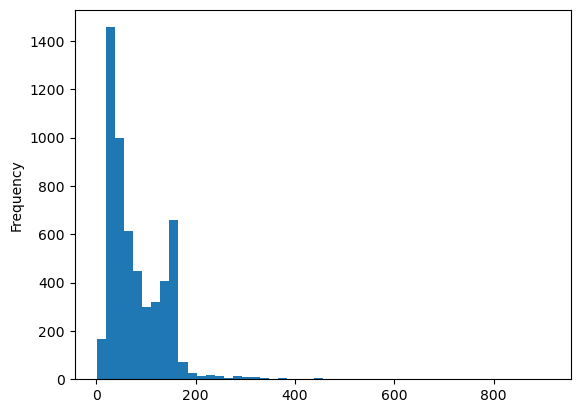

In [23]:
messages['length'].plot.hist(bins=50)

In [24]:
# text maybe a good feature to think about


In [25]:
# max is 910 mtlb 910 characters ka msgs bht lamba hoga bhue

messages['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [26]:
messages[messages['length']==910]

,label,messages,length
1085,ham,For me the love should start with attraction.i...,910


In [27]:
messages[messages['length']==910]['messages'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

In [28]:
messages[messages['messages'].str.contains('go', case=False)]

,label,messages,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
10,ham,I'm gonna be home soon and i don't want to tal...,109
18,ham,Fine if thats the way u feel. Thats the way ...,56
19,spam,England v Macedonia - dont miss the goals/team...,155
...,...,...,...
5540,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,158
5543,ham,U still havent got urself a jacket ah?,38
5554,ham,Well keep in mind I've only got enough gas for...,98
5555,ham,Yeh. Indians was nice. Tho it did kane me off ...,153


array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

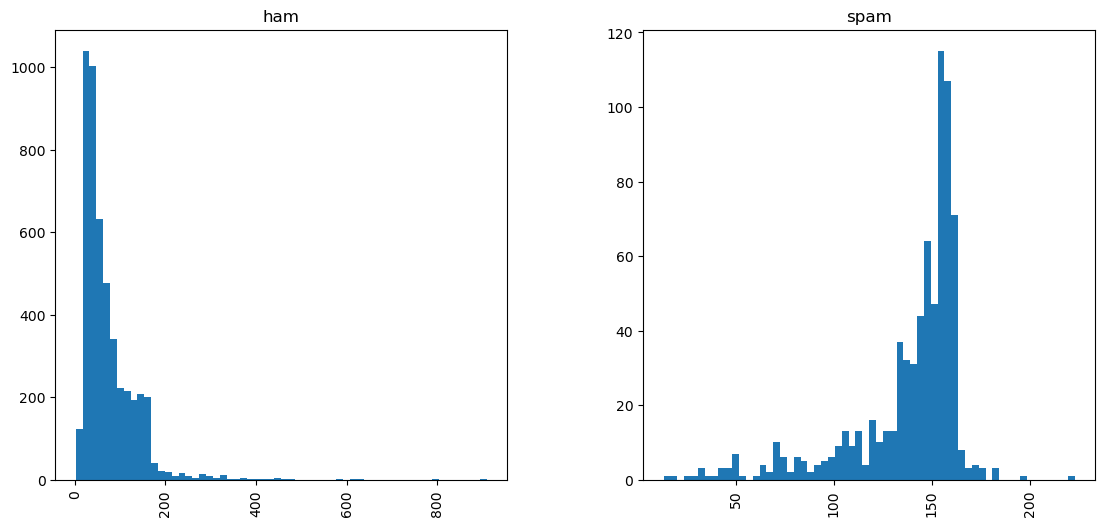

In [29]:
# facet grid type ka by pandas 
messages.hist(column='length',by='label',bins=60,figsize=(13,6))

In [30]:
# spam messages have more characters 
ham 0 se 200 k darmiyan ziada hams messags hain
spam 0 se 50 tk less hain 100 to 150 ziada hain

SyntaxError: invalid syntax (1941151155.py, line 2)

length is a good featire to distinguish a ham vs spam

In [47]:
# preprocessing krre cuz sb string mn hai aur classification ko numerical chhaye so

In [49]:
# sequences of characters ko numbers se repersent krenge
writng func that split mssage into its individual words and returns a list

SyntaxError: invalid syntax (4079440090.py, line 2)

common words remvove krre like a etc by using stop words

In [52]:
import string
# we're removing punctuation

In [54]:
mess='Sample message!! have:  a , good ! dayyy. it has punctuation'
string.punctuation



'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [56]:
nopunc=[c for c in mess if c not in string.punctuation]

In [58]:
nopunc

['S',
 'a',
 'm',
 'p',
 'l',
 'e',
 ' ',
 'm',
 'e',
 's',
 's',
 'a',
 'g',
 'e',
 ' ',
 'h',
 'a',
 'v',
 'e',
 ' ',
 ' ',
 'a',
 ' ',
 ' ',
 'g',
 'o',
 'o',
 'd',
 ' ',
 ' ',
 'd',
 'a',
 'y',
 'y',
 'y',
 ' ',
 'i',
 't',
 ' ',
 'h',
 'a',
 's',
 ' ',
 'p',
 'u',
 'n',
 'c',
 't',
 'u',
 'a',
 't',
 'i',
 'o',
 'n']

punction remvoed

In [61]:
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\FatimaTasneem\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [62]:
stopwords.words('english')
# stopwords in nglish

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [65]:
nopunc=''.join(nopunc)
# way of joining into list
nopunc

'Sample message have  a  good  dayyy it has punctuation'

In [67]:
# example of this
x=['a','b','c','d']
x

['a', 'b', 'c', 'd']

In [69]:
x=''.join(x)
x

'abcd'

In [71]:
x='***'.join(x)
x

'a***b***c***d'

In [73]:
x='*@$%^&'.join(x)
x

'a*@$%^&**@$%^&**@$%^&**@$%^&b*@$%^&**@$%^&**@$%^&**@$%^&c*@$%^&**@$%^&**@$%^&**@$%^&d'

In [75]:
nopunc.split()

['Sample', 'message', 'have', 'a', 'good', 'dayyy', 'it', 'has', 'punctuation']

In [77]:
# ab isme se stopwords remove kremge

In [79]:
clean_mess=[word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [81]:
clean_mess

['Sample', 'message', 'good', 'dayyy', 'punctuation']

In [83]:
# ye chote pe tha ab isko function m put krdo take dataframe pe apply hoskae


In [85]:
def text_process(mess):
    '''
    1.remove punc
    2.remove stop words
    3.return list of clean wrds
    '''
    nopunc=[char for char in mess if char not in string.punctuation]
    nopunc=''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]



In [87]:
# ye tokeniation khelati hai

In [89]:
messages.head()

,label,messages,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [91]:
messages['messages'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: messages, dtype: object

# ye tou bht simple tareeka tha normalization ka its called tokenization

now thers thing stemming means sbko apne base words m krdega like
run,running,ran convert to run

In [94]:
# ab humne punc,etc removr kdiya ab vectorization pe ajao

mtlb ke hr word ko numbers ki form m represent kro

# vectorization
called bag of words
1.count number of times word occur in each document known as term frequency


2.weigh the counts , so frequent tokens get lowe weight (inverse doc frequency)


3.normalize the vectors to unit length , to abstract from the original text length (L2 Norm)

In [98]:
from sklearn.feature_extraction.text import CountVectorizer

In [107]:
bow_transformer=CountVectorizer(analyzer=text_process).fit(messages['messages'])

In [109]:
print(len(bow_transformer.vocabulary_))
# print total number of vocanulary words 
# itne words hain vocab m

11425


In [111]:
mess4=messages['messages'][3]
mess4

'U dun say so early hor... U c already then say...'

In [113]:
bow4=bow_transformer.transform([mess4])
print(bow4)
# 7 new words hain in message 4
# aur 2 dafa 2 repeat hore hain
# baki sb eik dafa


  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


In [115]:
print(bow4.shape)

(1, 11425)


In [117]:
bow_transformer.get_feature_names_out()[4068]
# konsa word 2 dafa aya


'U'

In [119]:
bow_transformer.get_feature_names_out()[9554]

'say'

In [121]:
bow_transformer.get_feature_names_out()[6222]

'early'

In [123]:
print('hey')

hey


In [125]:
print("wal")

wal


In [130]:
bow5=bow_transformer.transform([messages['messages'][5]])

In [132]:
print(bow5)

  (0, 543)	1
  (0, 1943)	1
  (0, 2222)	1
  (0, 2346)	1
  (0, 3930)	1
  (0, 4379)	1
  (0, 4893)	1
  (0, 5467)	1
  (0, 5864)	1
  (0, 6755)	1
  (0, 7800)	1
  (0, 8567)	1
  (0, 9209)	1
  (0, 9641)	1
  (0, 10073)	1
  (0, 10093)	1
  (0, 11011)	1
  (0, 11150)	1
  (0, 11371)	1


In [136]:
# humne 4 ko transforn krkr dekhliya ab aur sb theek tha ab poore dataframe ko transform krdo

In [143]:
messages_bow=bow_transformer.transform(messages['messages'])

In [147]:
print(f"shape of sparse matrix{messages_bow.shape}")
# rows by colm

shape of sparse matrix(5572, 11425)


In [149]:
# amount of nonzero occurences
messages_bow.nnz

50548

In [153]:
# tfidg krre ab
from sklearn.feature_extraction.text import TfidfTransformer

In [155]:
tfidf_transformer= TfidfTransformer().fit(messages_bow)
# transformer ko jo messages ka bow banaya tha uspe lgado

In [157]:
# ab hum 4th message pe transformer lgare just to check

In [159]:
tfidf4=tfidf_transformer.transform(bow4)

In [163]:
print(tfidf4)
# inverse document freq and term freq of message 4

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


In [165]:
# university ki incverse doc frequncy dekhni hai
tfidf_transformer.idf_[bow_transformer.vocabulary_['university']]

8.527076498901426

In [167]:
messages_tfidf=tfidf_transformer.transform(messages_bow)

In [169]:
# ab iske bd hamamre msgs number ki form m present hogye
# ab classifier train krskte hain

In [ ]:
# naive bayes classifier use krre

In [171]:
from sklearn.naive_bayes import MultinomialNB

In [173]:
# 2nd arguemt label ye actual data h jo predict krna
spam_detect_model=MultinomialNB().fit(messages_tfidf,messages['label'])

In [175]:
# eik message classify krke dekhrae takay pata chale humne kese kiya hai
spam_detect_model.predict(tfidf4)

array(['ham'], dtype='<U4')

In [177]:
spam_detect_model.predict(tfidf4)[0]

'ham'

In [179]:
messages['label'][3]

'ham'

In [181]:
all_pred=spam_detect_model.predict(messages_tfidf)

In [183]:
all_pred

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype='<U4')

# impppp
humne sara data pe train krliya but humein chhaye tha ke hum split kren into ytaining and testng
we should use train test split

In [186]:
from sklearn.model_selection import train_test_split

# ab dekho kia 
ya tou hum saray steps dubara kren like dunara se vectorize kren
dubara se tfidf lagye transform kren 
aur jo kuch bhi upar kiya wo dubara kren



ya ML ka builtin pipeline lagaye 
pipeline m bs steps define krdo eik ke bd eik 
aur wo khudi lgjate 
pipeline takes list of steps []iske andar [('',..)]
mtlb list k andar tuple uske andar string m naam likjdo step ka any ur choice
then uske bd usko instantiate krdo

In [191]:
msg_train,msg_test,label_train,label_test=train_test_split(
    messages['messages'],messages['label'],test_size=0.3
)
# features are msgs themselves
# aur phir labels


In [193]:
msg_train

1683    HI BABE U R MOST LIKELY TO BE IN BED BUT IM SO...
1842                              I am in your office na.
3134                            So no messages. Had food?
2584                Goodmorning, today i am late for 1hr.
5557    No. I meant the calculation is the same. That ...
                              ...                        
1615    Me sef dey laugh you. Meanwhile how's my darli...
2337    Aww you must be nearly dead!Well Jez isComing ...
2353                        Thats cool. How was your day?
2235    What's your room number again? Wanna make sure...
2293                           :-( that's not v romantic!
Name: messages, Length: 3900, dtype: object

In [195]:
from sklearn.pipeline import Pipeline

In [197]:
pipeline=Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB())
])

In [199]:
# ab hum directly text data pass krdenge baki steps pipeline khud krlega

In [201]:
# jo 3 steps define kiye hain pipeline usey khud krlega
pipeline.fit(msg_train,label_train)


Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x00000221FD550AE0>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [203]:
predictions=pipeline.predict(msg_test)

In [205]:
predictions

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [207]:
# ab dekhnege kesa perform kara by using classification report

In [209]:
from sklearn.metrics import classification_report

In [211]:
print(classification_report(label_test,predictions))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1438
        spam       1.00      0.72      0.84       234

    accuracy                           0.96      1672
   macro avg       0.98      0.86      0.91      1672
weighted avg       0.96      0.96      0.96      1672



In [213]:
# now use random forest classifier

In [215]:
from sklearn.ensemble import RandomForestClassifier

In [217]:
pipeline=Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
        ('classifier',RandomForestClassifier())
])

In [219]:
# jo 3 steps define kiye hain pipeline usey khud krlega
pipeline.fit(msg_train,label_train)


Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x00000221FD550AE0>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', RandomForestClassifier())])

In [221]:
preds=pipeline.predict(msg_test)


In [223]:
print(classification_report(label_test,preds))

              precision    recall  f1-score   support

         ham       0.97      1.00      0.98      1438
        spam       0.99      0.78      0.87       234

    accuracy                           0.97      1672
   macro avg       0.98      0.89      0.93      1672
weighted avg       0.97      0.97      0.97      1672

